# Курс «Машинное обучение в бизнесе»

## Урок 2. Кейс 1. Преобразование признаков

### Домашнее задание к уроку 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

from sklearn.metrics import mean_squared_error

import os

Обозначения:  
p - глубина истории, сколько измерений назад учитываем в моделях  
h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

#### Задание 1

Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти".

In [2]:
df = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [3]:
df.head(10)

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0
2002-01-01,06:00:00,28654.0,2002,1,1,1,1,1,1,6,1,0,0
2002-01-01,07:00:00,29308.0,2002,1,1,1,1,1,1,7,1,0,0
2002-01-01,08:00:00,29595.0,2002,1,1,1,1,1,1,8,1,0,0
2002-01-01,09:00:00,29943.0,2002,1,1,1,1,1,1,9,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             145374 non-null  object 
 1   PJME_MW          145374 non-null  float64
 2   year             145374 non-null  int64  
 3   month            145374 non-null  int64  
 4   dayofmonth       145374 non-null  int64  
 5   quarter          145374 non-null  int64  
 6   dayofyear        145374 non-null  int64  
 7   weekofyear       145374 non-null  int64  
 8   dayofweek        145374 non-null  int64  
 9   hour             145374 non-null  int64  
 10  is_holiday       145374 non-null  int64  
 11  is_prev_holiday  145374 non-null  int64  
 12  is_next_holiday  145374 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 15.5+ MB


In [5]:
df.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


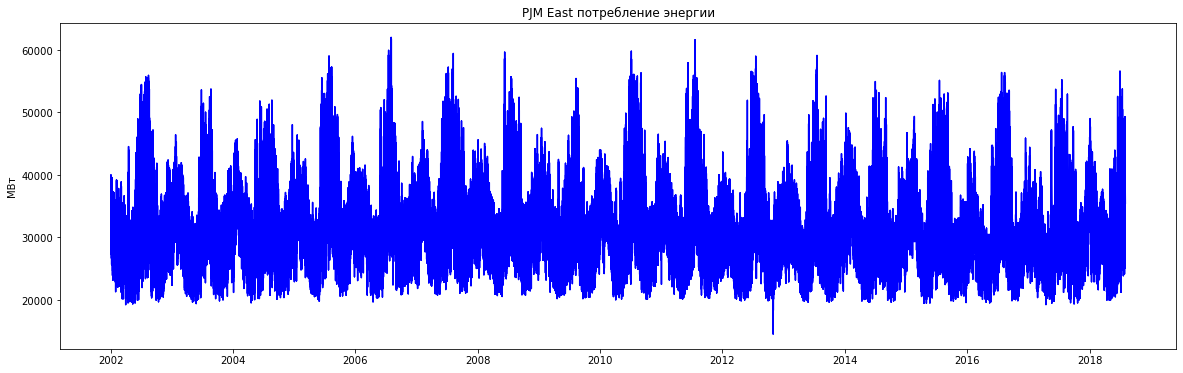

In [6]:
plt.figure(figsize =(20,6))
plt.plot(df.index, df['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel('МВт')
plt.show()

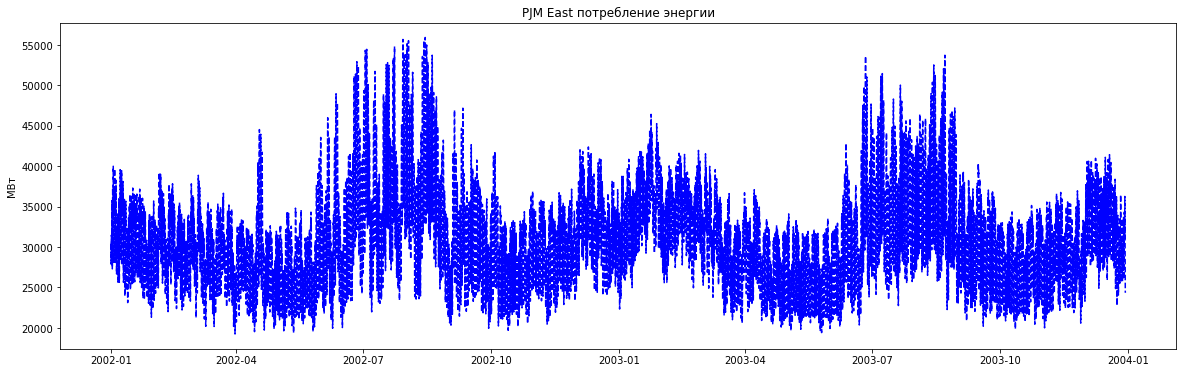

In [7]:
date_time =df['PJME_MW']
date_time.index = pd.date_range(df.index[0], periods=df.index.shape[0], freq="H")
plt.figure(figsize =(20,6))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

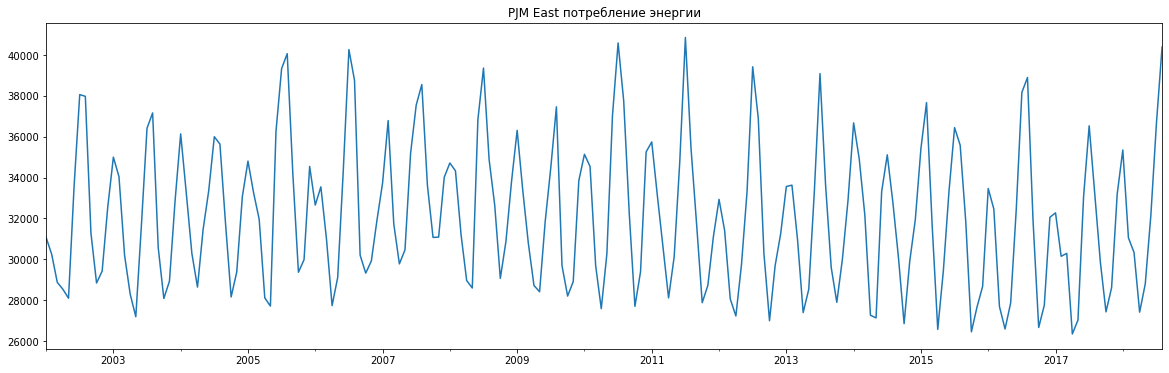

In [8]:
df['PJME_MW'].resample('M').mean().plot(figsize=(20, 6), title='PJM East потребление энергии')

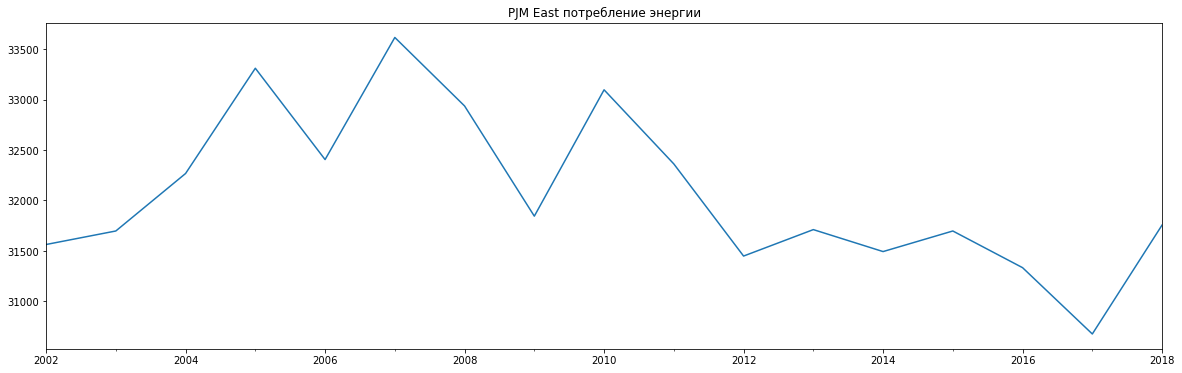

In [9]:
df['PJME_MW'].resample('Y').mean().plot(figsize=(20, 6), title='PJM East потребление энергии')

Периодичность на графиках просматривается.

Посчитаем периодичности точно.

In [10]:
def get_diff(data, h, colunm_name):
    result = np.zeros(len(data.iloc[:].index))
    subresult = data[colunm_name].values[2*h:] - data[colunm_name].values[:-2*h]
    for i in range(len(subresult)):
        result[i + h] = subresult[i]
    return result

In [11]:
def get_diff_std(data, h, colunm_name):
    return (data[colunm_name].values[2*h:] - data[colunm_name].values[:-2*h]).std()

In [12]:
def diff_std(data, colunm_name):
    count = int(len(data.iloc[:].index) / 2) - 1
    result = []
    for i in range(1, count):
        result.append(get_diff_std(data, i, colunm_name))
    return result

In [13]:
res = diff_std(df, 'PJME_MW')

In [14]:
len(res)

72685

In [15]:
def plot_diff_std(stds, min=None, max=None):
    plt.figure(figsize=(20,6))
    plt.plot(res[min:max])
    plt.xlabel('единиц')
    plt.title('Стандартное отклонение в зависимости от смещения')

Посмотрим графики на разных масштабах

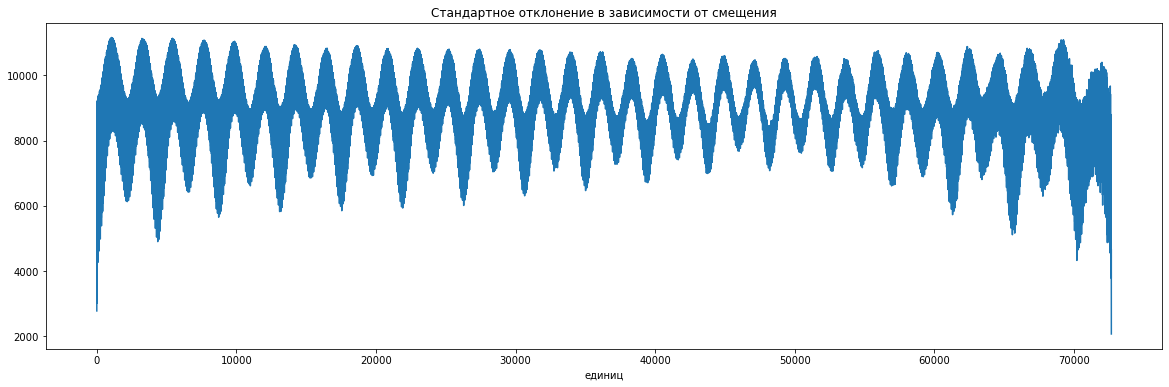

In [16]:
plot_diff_std(res)

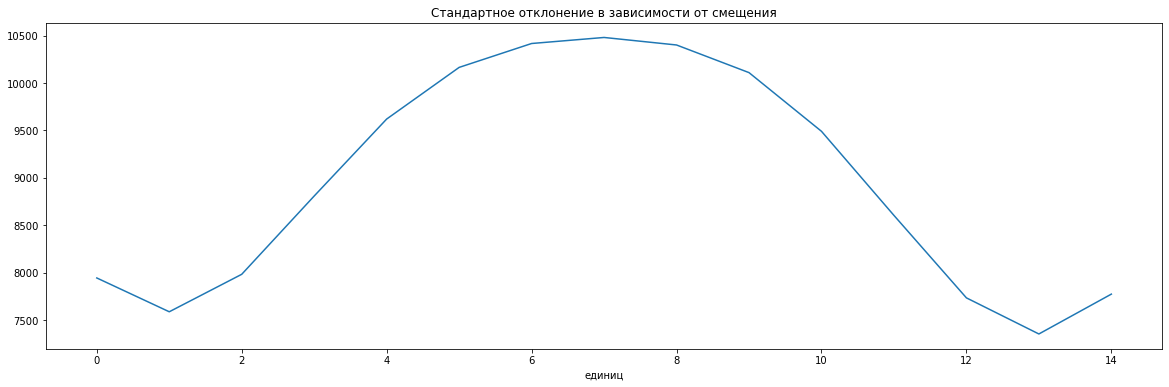

In [17]:
plot_diff_std(res, min=646, max=661)

На малых периодах, видимо данные собирались с частотой раз в два часа, то получается, что период 12 единиц.

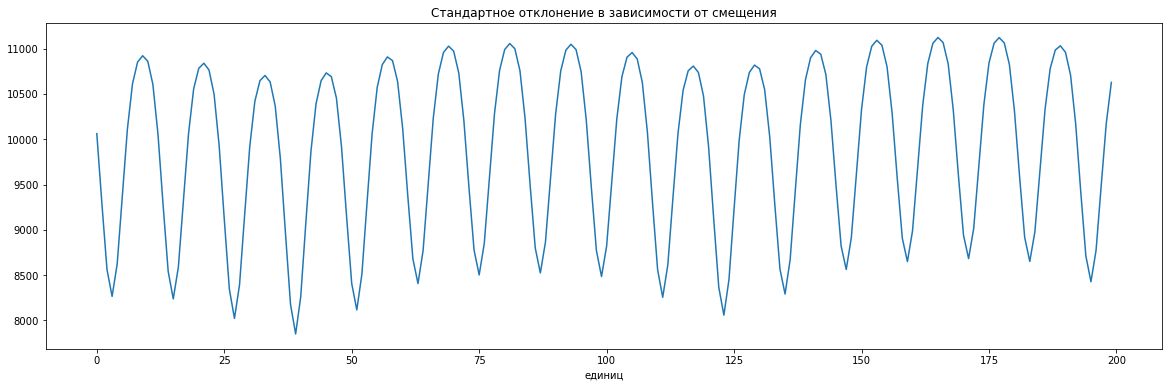

In [18]:
plot_diff_std(res, min=800, max=1000)

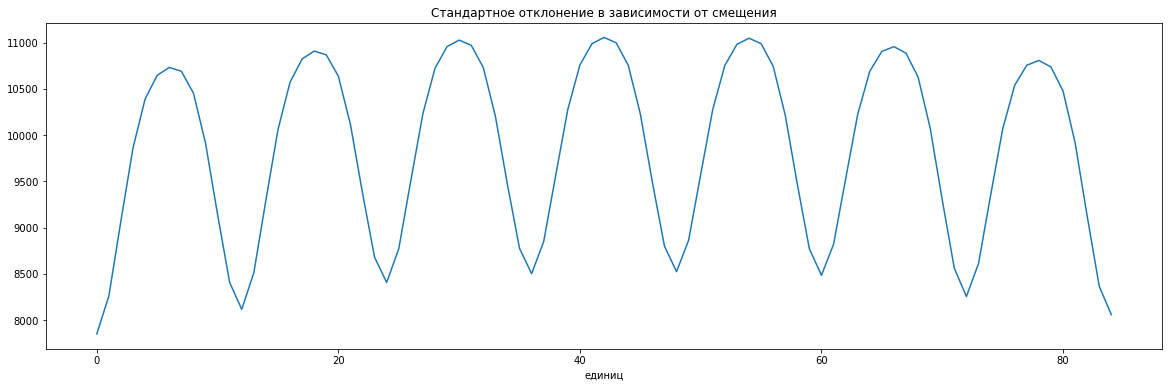

In [19]:
plot_diff_std(res, min=839, max=924)

Недельный период составил около 85 единиц.

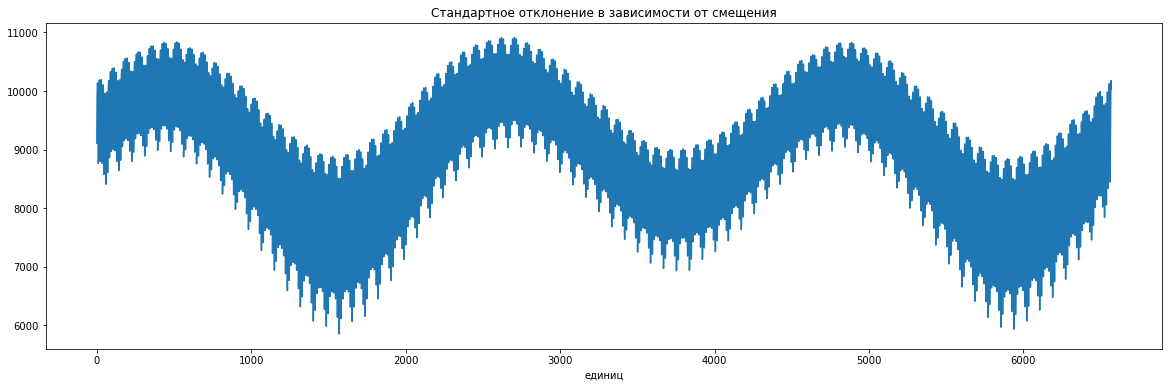

In [20]:
plot_diff_std(res, min=15981, max=22551)

Очевидно что есть периодичность в полгода в 2190 единиц годовая в 4380 единиц.

Можно посчитать все минимумы для каждого периода и вывести среднее значение.

Мы получили значения нескольких перидов: дневной, недельный, полугодовой, годовой. Можно данный набор разложить в ряд Фурье.

In [21]:
d_data = df['PJME_MW'].values[1:] - df['PJME_MW'].values[:-1]

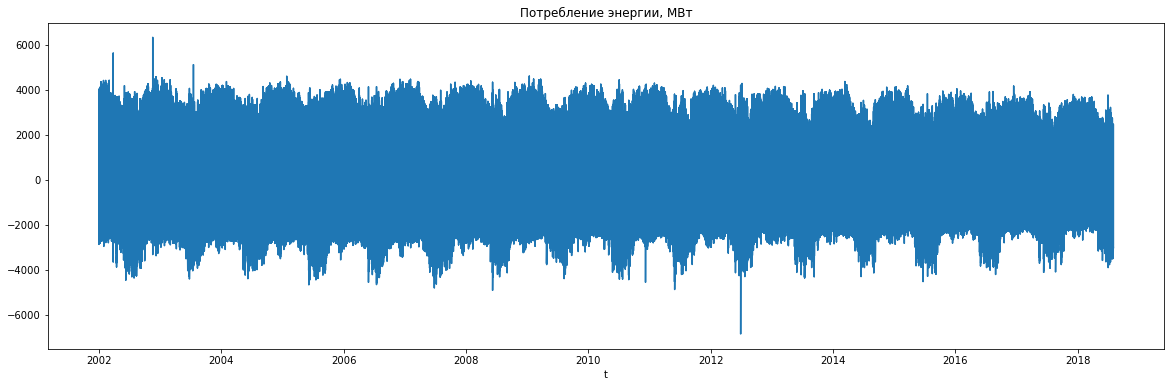

In [22]:
plt.figure(figsize=(20,6))
plt.plot(df.iloc[:-1].index,d_data)
plt.xlabel('t')
plt.title('Потребление энергии, МВт')
plt.show()

In [23]:
DF_data = sm.tsa.stattools.adfuller(df.resample('M').mean()['PJME_MW'].values,regression='ctt')
DF_data

(-2.5774555917298194,
 0.5247860093675522,
 15,
 184,
 {'1%': -4.435220952056536,
  '5%': -3.86487409876613,
  '10%': -3.5733156719443473},
 3230.9060995689206)

In [24]:
DF_data_d = sm.tsa.stattools.adfuller(d_data,regression='ctt')
print('коэффициент ADF для 1-й разности потребления энергии: ', DF_data_d[1])

коэффициент ADF для 1-й разности потребления энергии:  0.0


Получили стационарный ряд. Сгладим наш ряд.

In [25]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [26]:
b_ar = df['PJME_MW'].values
b_s = pd.DataFrame(data = df[['PJME_MW']])

In [27]:
b_s.head()

,PJME_MW
Date,
2002-01-01,30393.0
2002-01-01,29265.0
2002-01-01,28357.0
2002-01-01,27899.0
2002-01-01,28057.0


In [28]:
data_exp_1 = exponential_smoothing(df['PJME_MW'], 0.05)

In [29]:
# plt.figure(figsize=(20, 9))
# plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], '.b',label='исходный ряд')
# plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");
# plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание сезон");
# plt.xlabel('time')
# plt.ylabel('MW')
# plt.legend()
# plt.title('PJME_MW')

In [30]:
data_exp_1 = pd.DataFrame(data = data_exp_1, index = b_s.index)
#без тренда 
brent_data_trend_free = (b_s['PJME_MW'] - data_exp_1.iloc[:,0])
brent_data_trend_free.head()
DF_brent = sm.tsa.stattools.adfuller(brent_data_trend_free , regression = 'ctt')
DF_brent

(-52.59991118995178,
 0.0,
 75,
 145298,
 {'1%': -4.371209756407774,
  '5%': -3.8324306460238056,
  '10%': -3.553285187108092},
 2077152.6897340622)

In [31]:
df_end= pd.DataFrame(data_exp_1)
df_end.head()
 # добавили историю на глубину 3 измерения от текущего (р=3)
df_end['t'] = 0
df_end.iloc[1:,1] = df_end.iloc[:-1,0].values
df_end['t1'] = 0
df_end.iloc[2:,2] = df_end.iloc[:-2,0].values
df_end['t2'] = 0
df_end.iloc[3:,3] = df_end.iloc[:-3,0].values
df_end.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df_end['exp_0_01'] = exponential_smoothing(df_end[0], 0.01)
df_end['exp_0_03'] = exponential_smoothing(df_end[0], 0.03)
df_end['exp_0_08'] = exponential_smoothing(df_end[0], 0.08)
# добавим разности - 1-й порядок
df_end['diff1'] = 0
df_end['diff1'].iloc[1:] = df_end.iloc[:-1,0]-df_end.iloc[1:,0]
df_end.head()

KeyboardInterrupt: 

In [ ]:
df_end.columns

In [ ]:
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

train_b, test_b = split_data_b( df_end, '10-10-2018')

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df_end.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df_end.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(train_b.index.get_level_values('Дата'),train_b[df_end.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Дата'),test_b[df_end.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure(figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.plot(b_s.loc['2018-10-11':].index, b_s.loc['2018-10-11':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

Для h = 1

In [ ]:
h = 1
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df_end.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df_end.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(b_s.loc['2018-11-02':].index, b_s.loc['2018-11-02':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

Для h = 10

In [ ]:
h = 10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df_end.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df_end.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.plot(b_s.loc['2018-11-02':].index, b_s.loc['2018-11-02':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

#### Задание 2

Оцените ошибку модели из п.1.

В работе (пока не могу досчитать, компьютер зависает)

#### Задание 3

Сделайте вывод о том, как изменилась ошибка модели по значениям h.

В работе (пока не могу досчитать, компьютер зависает)

#### Задание 4

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):  
а) Изменение температуры за окном :).  
б) Количество денег, которые тратят покупатели в интернет магазине.  
в) Вес растущего котенка.  
г) Прирост объема деревьев в лесу от времени

а) Стационарный с сезоном (летом тепло, зимой холодно, средняя температура не меняется).
б) Нестационарный с трендом (вообще стохастический, меняется случайно, но тем не менее возрастающий, т.к. все больше и больше покупателей покупают онлайн).
в) Нестационарный с трендом и сезоном (котенок растет и вес его набирается пока не дойдет до опеределенного предела, судя по моему коту он еще и сезонный, так как к лету мой кот набирает вес, а к зиме сбрасывает).
г) Стационарный (баланс погибших деревьев и взошедших со временем сохраняется, грубо говоря сколько погибло, столько же примерно и народилось и со временем это не меняется, правда могуть быть случайные события в виде пожара и прочее, но это случайность не в счет).